### SECTION 2 – DATA MINING
Task 1.1 – Load the Dataset

In [22]:
# Task 1.1 – Load the dataset (Iris from scikit-learn)

# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris

# Load Iris dataset as a Pandas DataFrame
iris = load_iris(as_frame=True)

# iris.frame contains both features and target
df = iris.frame

# Rename the target column for clarity
df.rename(columns={"target": "species_id"}, inplace=True)

# Map numeric species_id to species names (e.g., 0 -> setosa)
df['species'] = df['species_id'].map(dict(zip(range(3), iris.target_names)))

# Show the first 5 rows to confirm structure
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species_id species  
0           0  setosa  
1           0  setosa  
2           0  setosa  
3           0  setosa  
4           0  setosa  


Task 1.2 – Preprocessing

In [23]:
# Task 1.2 – Preprocess the dataset

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np

# --- Step 1: Check for missing values ---
print("\nMissing values per column:")
print(df.isnull().sum())  # Iris has no missing values

# --- Step 2: Normalize numeric features using Min-Max Scaling ---
scaler = MinMaxScaler()
numeric_features = df.iloc[:, 0:4]  # First 4 columns are numeric features
df_scaled = pd.DataFrame(scaler.fit_transform(numeric_features),
                         columns=numeric_features.columns)

# --- Step 3: Encode species column using One-Hot Encoding ---
encoder = OneHotEncoder(sparse_output=False)
species_encoded = encoder.fit_transform(df[['species']])
species_df = pd.DataFrame(species_encoded, columns=encoder.get_feature_names_out(['species']))

# --- Step 4: Combine scaled features and encoded labels ---
df_preprocessed = pd.concat([df_scaled, species_df], axis=1)

# Preview preprocessed dataset
print("\nPreprocessed data (first 5 rows):")
print(df_preprocessed.head())



Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species_id           0
species              0
dtype: int64

Preprocessed data (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   species_setosa  species_versicolor  species_virginica  
0             1.0                 0.0                0.0  
1             1.0                 0.0                0.0  
2             1.0                 0.0                0.0  
3             1.0                 0.0                0.0  
4             1.

In [24]:
# --- Step 5: Save the preprocessed dataset ---
df_preprocessed.to_csv("iris_preprocessed.csv", index=False)
print("Preprocessed data saved to iris_preprocessed.csv")



Preprocessed data saved to iris_preprocessed.csv


Task 1.3 – Data Exploration

In [25]:
# Task 1.3 – Explore the dataset

import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Summary statistics ---
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  species_id  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

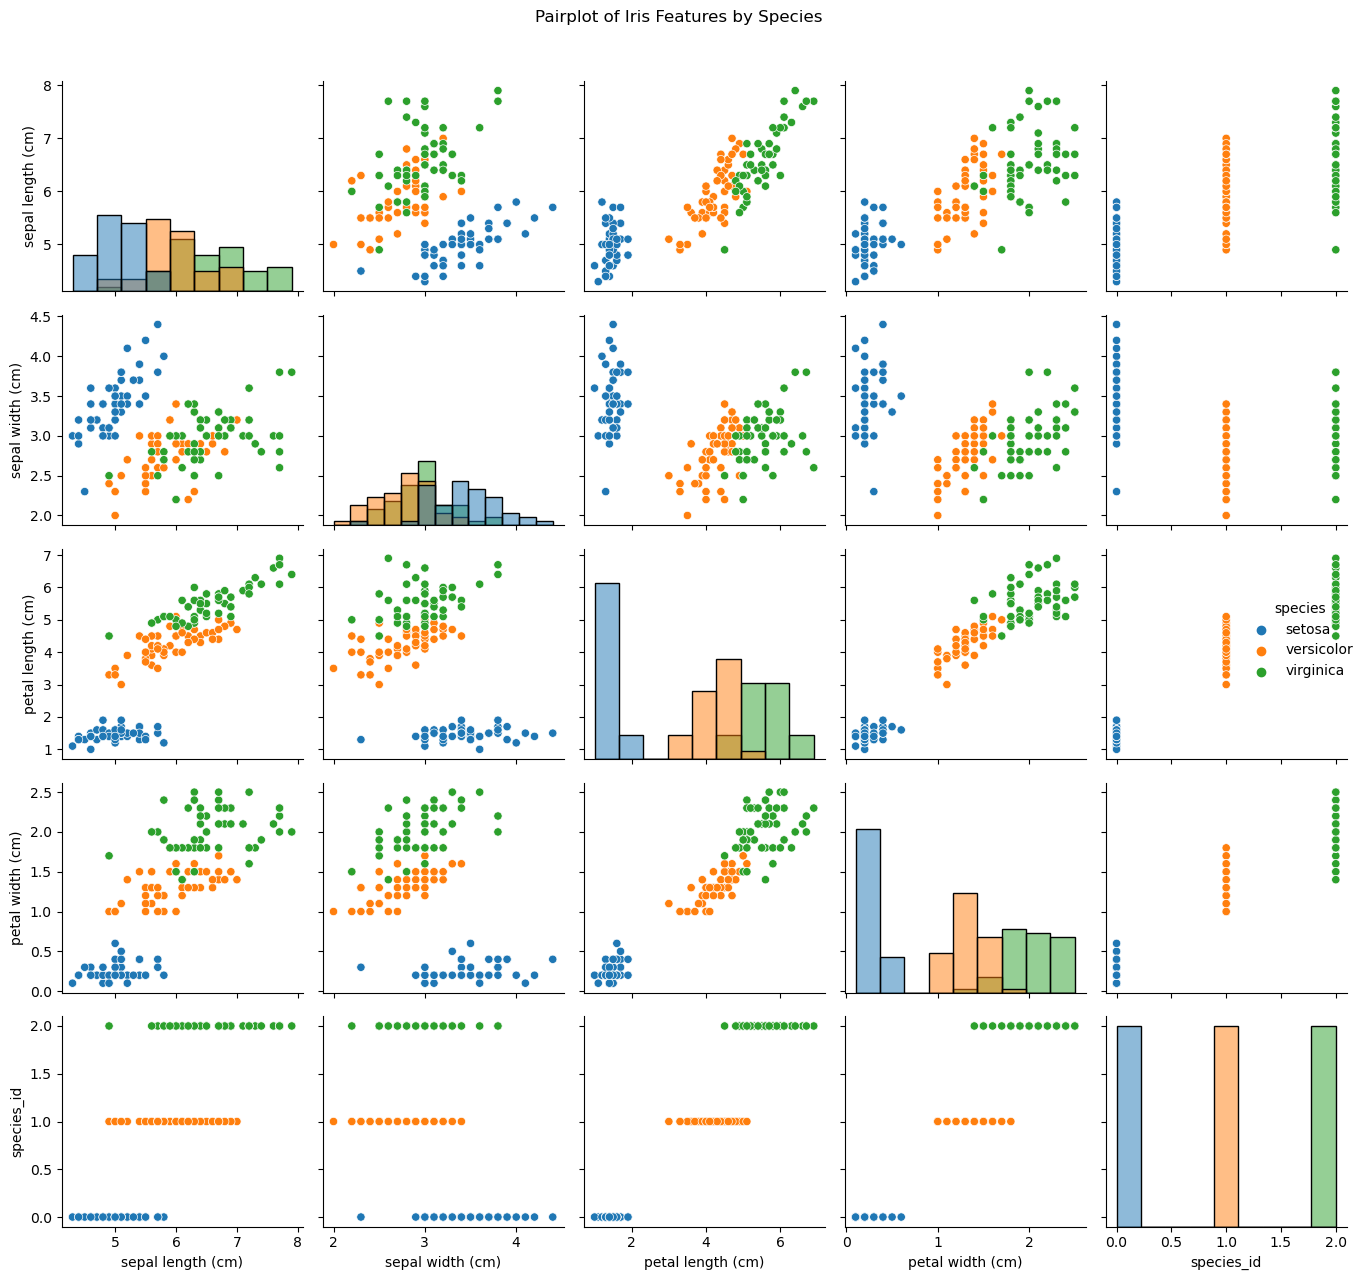

In [26]:
# --- Step 2: Pairplot to visualize feature relationships ---
sns.pairplot(df, hue="species", diag_kind="hist")
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.tight_layout()
plt.savefig("iris_pairplot.png", dpi=300)
plt.show()


## My Interpretation of the Iris Pairplot

When I look at the diagonal plots, I see histograms that show how each feature—like sepal length, sepal width, petal length, and petal width—is distributed across the three iris species. This helps me understand how each species varies individually in terms of these features.

The off-diagonal scatter plots are really useful for seeing how two features relate to each other. For example, I can compare petal length with petal width, or sepal length with sepal width, and see how the species cluster differently.

One thing that stands out to me is how clearly **Setosa** is separated from the other two species in most of the feature combinations, especially when it comes to petal dimensions. On the other hand, **Versicolor** and **Virginica** do overlap a bit, but I can still tell them apart—particularly when I look at petal length and width.

Overall, this plot gives me a good visual understanding of how the features contribute to distinguishing between the iris species.


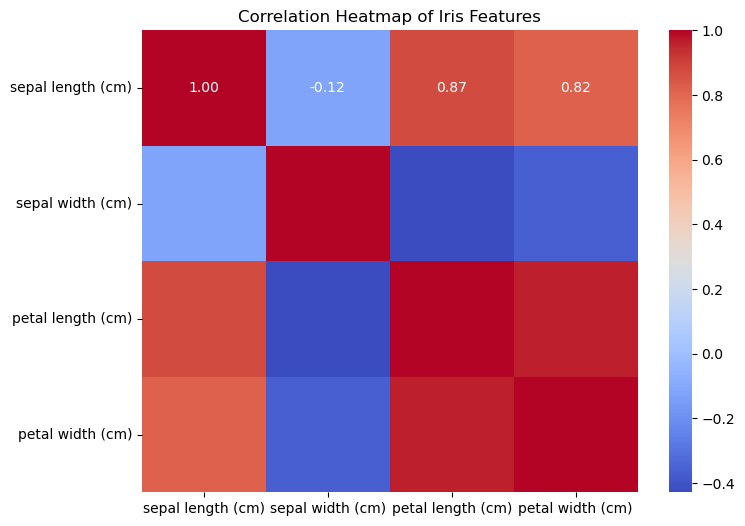

In [27]:
# --- Step 3: Correlation heatmap ---
plt.figure(figsize=(8, 6))
corr = df.iloc[:, 0:4].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Iris Features")
plt.savefig("iris_correlation_heatmap.png", dpi=300)
plt.show()




## My Interpretation of the Iris Feature Correlation Heatmap

This heatmap helps me understand how the different features of the Iris dataset relate to each other. It shows the **correlation coefficients** between:

- Sepal Length (cm)
- Sepal Width (cm)
- Petal Length (cm)
- Petal Width (cm)

The color scale ranges from **-0.4 (blue)** to **1.0 (red)**, where:
- **1.0** means a perfect positive correlation,
- **-1.0** would mean a perfect negative correlation,
- and **0** means no correlation.

### What I Observed:

- **Petal length and petal width** have a very strong positive correlation (**0.96**), which tells me that as one increases, the other tends to increase too.
- **Sepal length** is also strongly correlated with **petal length (0.87)** and **petal width (0.82)**. This suggests that longer sepals often come with longer and wider petals.
- **Sepal width**, on the other hand, has a **negative correlation** with most other features:
  - It’s weakly negatively correlated with **sepal length (-0.12)**.
  - It has a moderate negative correlation with **petal length (-0.42)** and **petal width (-0.37)**.
  
This tells me that **sepal width behaves a bit differently** compared to the other features and might not be as useful for predicting petal characteristics.

Overall, this heatmap gives me a quick and clear view of which features are closely related and which ones aren’t. It’s especially helpful for deciding which features might be most useful in a classification model.


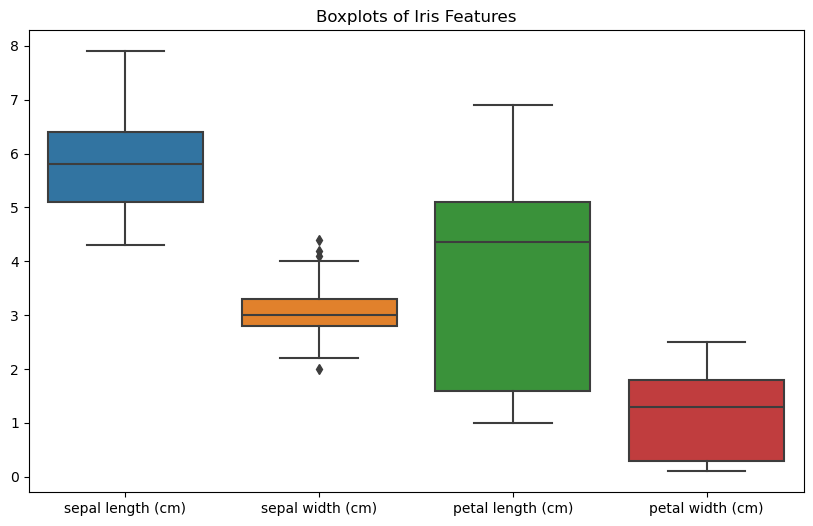

In [28]:
# --- Step 4: Boxplots for outlier detection ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, 0:4])
plt.title("Boxplots of Iris Features")
plt.savefig("iris_boxplots.png", dpi=300)
plt.show()


## My Interpretation of the Iris Feature Boxplots

This plot shows boxplots for four features in the Iris dataset:

- **Sepal Length (cm)**
- **Sepal Width (cm)**
- **Petal Length (cm)**
- **Petal Width (cm)**

### What I Noticed:

Each boxplot gives me a quick summary of how the values for each feature are spread out. I can see the **median**, **quartiles**, and any **outliers** for each feature.

- **Petal length and petal width** have a wider range compared to the sepal features, which tells me there's more variation in petal size among the flowers.
- **Sepal width** seems to have a few outliers, and its distribution looks a bit more spread out and less symmetric than the others.
- **Sepal length** and **petal length** have relatively compact distributions, but petal length still shows a wider spread than sepal length.

These boxplots help me quickly compare the variability and central tendency of each feature. It’s a useful way to spot which features might be more informative or have more variation across the dataset.


Task 1.4 – Train/Test Split Function

In [29]:
# Task 1.4 – Define a function for train/test split

# Import the train_test_split function from scikit-learn
# This will be used to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

def split_data(X, y, test_size=0.2, random_state=42):
    """
    Splits the dataset into training and testing sets.

    Parameters:
        X (DataFrame): Features (independent variables)
        y (Series or array): Target labels (dependent variable)
        test_size (float): Proportion of the dataset to be used as the test set
                           Default is 0.2 (20% test data, 80% training data)
        random_state (int): Random seed for reproducibility.
                            Ensures we get the same split each time we run it.

    Returns:
        X_train (DataFrame): Training features
        X_test (DataFrame): Testing features
        y_train (Series/array): Training labels
        y_test (Series/array): Testing labels
    """

    # Call sklearn's train_test_split with the given parameters
    # It automatically shuffles the data before splitting
    return train_test_split(X, y, test_size=test_size, random_state=random_state)


# ----------------------------
# Example usage of the split_data function
# ----------------------------

# Here, df_scaled contains the normalized feature values
# df['species_id'] is the numeric target label for species
X_train, X_test, y_train, y_test = split_data(df_scaled, df['species_id'])

# Print the shape of each set to confirm the split
print("\nTrain/Test split shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)



Train/Test split shapes:
X_train: (120, 4) X_test: (30, 4)
y_train: (120,) y_test: (30,)
